Convert data - original.arff to data - original.csv.
       Immobilized_bus  Broken_Truck  Accident_victim  \
count       140.000000    140.000000       138.000000   
mean          0.335714      8.007143         0.449275   
std           0.652728     84.448912         0.725676   
min           0.000000      0.000000         0.000000   
25%           0.000000      0.000000         0.000000   
50%           0.000000      1.000000         0.000000   
75%           1.000000      1.000000         1.000000   
max           4.000000   1000.000000         3.000000   

       Occurrence_involving_freight  Incident_involving_dangerous_freight  \
count                    140.000000                            138.000000   
mean                       0.007143                              0.007246   
std                        0.084515                              0.085126   
min                        0.000000                              0.000000   
25%                        0.000000             

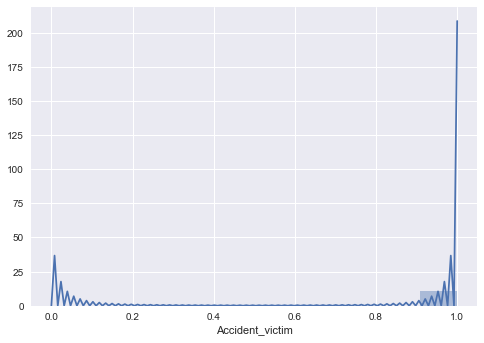

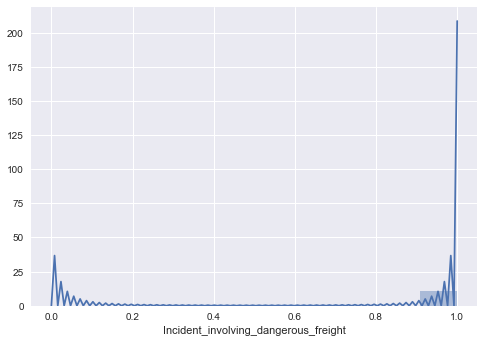

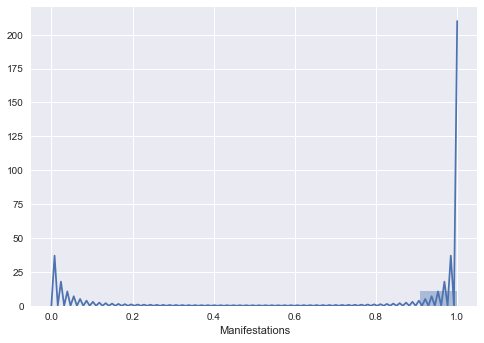

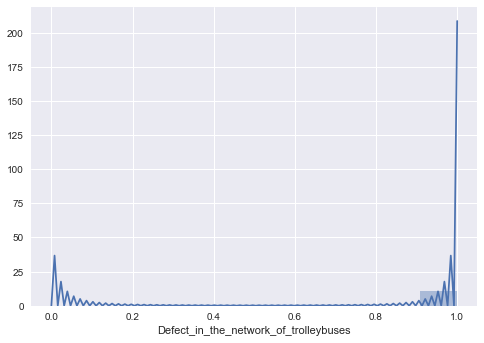

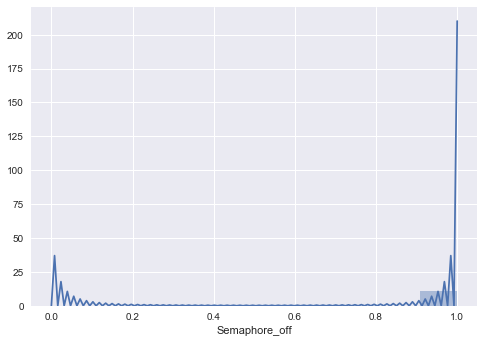

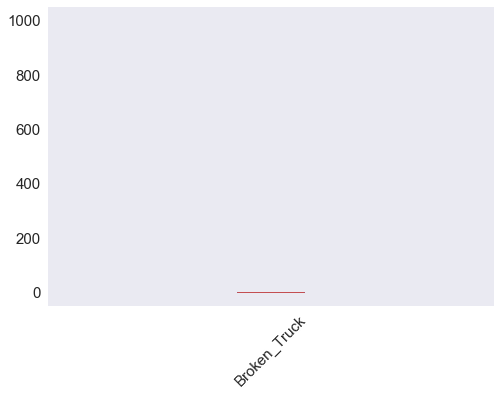

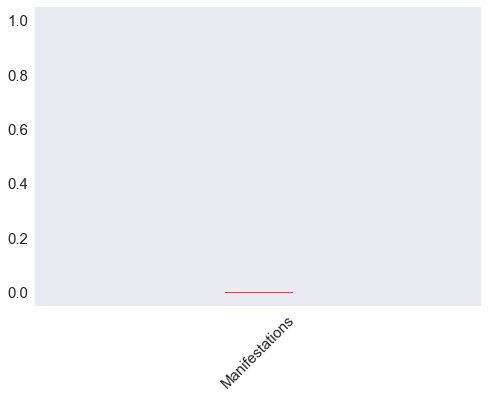

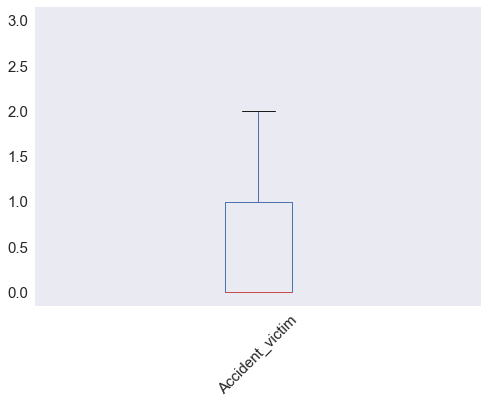

In [1]:
from scipy.io import arff
import pandas as pd
import sys, getopt
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline
# Step 1 -  . Convert to csv and load data 

def arff2csv(arff_path, csv_path=None, _encoding='utf8'):
    with open(arff_path, 'r', encoding=_encoding) as fr:
        attributes = []
        if csv_path is None:
            csv_path = arff_path[:-4] + 'csv'  # *.arff -> *.csv
        write_sw = False
        with open(csv_path, 'w', encoding=_encoding) as fw:
            for line in fr.readlines():
                if write_sw:
                    fw.write(line)
                elif '@data' in line:
                    fw.write(','.join(attributes) + '\n')
                    write_sw = True
                elif '@attribute' in line:
                    attributes.append(line.split()[1])  # @attribute attribute_tag numeric
    print("Convert {} to {}.".format(arff_path, csv_path))

arff2csv('data - original.arff', 'data - original.csv')

#data = arff.loadarff('C:\BITS PILANI\C2-Feature Engineering\Project1\data.arff')
#data = arff.loadarff('data - original.arff')
#df = pd.DataFrame(data[0])
pd.set_option('display.max_columns', None)
missing_values = ["n/a", "na", "-1", " "]
df = pd.read_csv('data - original.csv', na_values = missing_values);


# Step 2 -  Finding Missing values 
print(df.describe())
print('no of records - ', df.shape)
#print(df.head())
print(df.isnull().sum())
#df.isnull().mean()

#Step 3  - visualize distrubution for columsn which have missing data  
sns.set(color_codes=True)
plt.figure() 
sns.distplot(df.Accident_victim.notnull());
plt.figure() 
sns.distplot(df.Incident_involving_dangerous_freight.notnull());
plt.figure()
sns.distplot(df.Manifestations.notnull());
plt.figure()
sns.distplot(df.Defect_in_the_network_of_trolleybuses.notnull());
plt.figure()
sns.distplot(df.Semaphore_off.notnull());
plt.figure()
#Step 4   - Impute missing values


#Step 5 check outliers 
boxplot = df.boxplot(column=['Broken_Truck'], grid=False, rot=45, fontsize=15)
plt.figure()
boxplot = df.boxplot(column=['Manifestations'], grid=False, rot=45, fontsize=15)
plt.figure()
boxplot = df.boxplot(column=['Accident_victim'], grid=False, rot=45, fontsize=15)
plt.figure()